In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
train = pd.read_csv(r'D:\Coursera\Exploratory Data Analysis\Titanic - Honors Project\kaggle-titanic-master\input\train.csv')
test = pd.read_csv(r'D:\Coursera\Exploratory Data Analysis\Titanic - Honors Project\kaggle-titanic-master\input\test.csv')
gender_submission = pd.read_csv(r'D:\Coursera\Exploratory Data Analysis\Titanic - Honors Project\kaggle-titanic-master\input\gender_submission.csv')

In [127]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [128]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [130]:
test_set = gender_submission.merge(test, on='PassengerId')

In [131]:
test_set.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [132]:
data = pd.concat([train, test_set], axis=0, sort=False)

In [133]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [134]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [135]:
data.isnull().sum()

PassengerId       0
Survived          0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [136]:
data.drop(['Cabin'], axis=1, inplace=True)

In [137]:
data = data.dropna(subset=['Embarked','Fare'],inplace=False)

In [138]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [139]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            263
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [140]:
data['Age'].fillna(data['Age'].median(), inplace=True)

In [141]:
data.duplicated().sum()

0

In [142]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1306.000000,1306.000000,1306.000000,1306.000000,1306.00000,1306.000000,1306.000000
mean,655.022205,0.376723,2.296325,29.448063,0.50000,0.385911,33.223956
std,377.913727,0.484750,0.837037,12.857848,1.04258,0.866357,51.765986
min,1.000000,0.000000,1.000000,0.170000,0.00000,0.000000,0.000000
25%,328.250000,0.000000,2.000000,22.000000,0.00000,0.000000,7.895800
50%,654.500000,0.000000,3.000000,28.000000,0.00000,0.000000,14.454200
75%,981.750000,1.000000,3.000000,35.000000,1.00000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.00000,9.000000,512.329200


In [143]:
data.shape

(1306, 11)

In [144]:
data['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [145]:
data['Embarked'].replace({'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'}, inplace=True)

In [146]:
data['Embarked'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown'], dtype=object)

In [147]:
data['Survived'].unique()

array([0, 1], dtype=int64)

In [148]:
data['Survived'].replace({0: 'Died', 1: 'Survived'}, inplace=True)

In [149]:
data['Pclass'].unique()

array([3, 1, 2], dtype=int64)

In [150]:
data['Pclass'].replace({1: 'First Class', 2: 'Second Class', 3: 'Third Class'}, inplace=True)

**Feature Engineering**

In [151]:
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1 # 1 for self

**Exploratory Data Analysis**

C:\Users\Dharshan\AppData\Local\Temp\ipykernel_24516\4086346209.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=data, palette='flare')


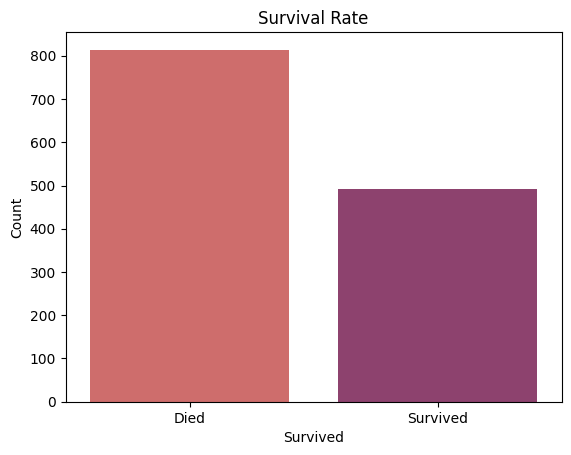

In [170]:
sns.countplot(x='Survived', data=data, palette='flare')
plt.title('Survival Rate')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

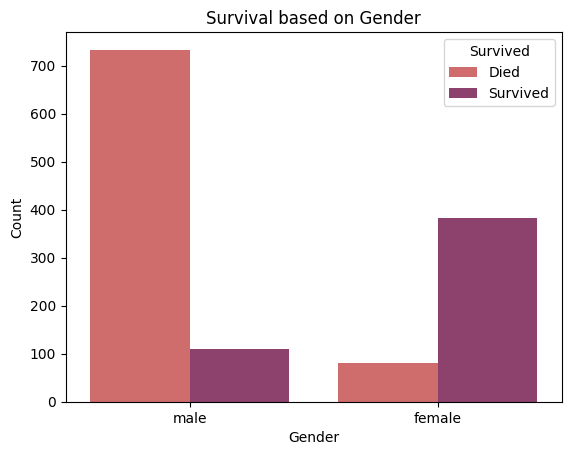

In [153]:
sns.countplot(x='Sex', hue='Survived', data=data, palette='flare')
plt.title('Survival based on Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

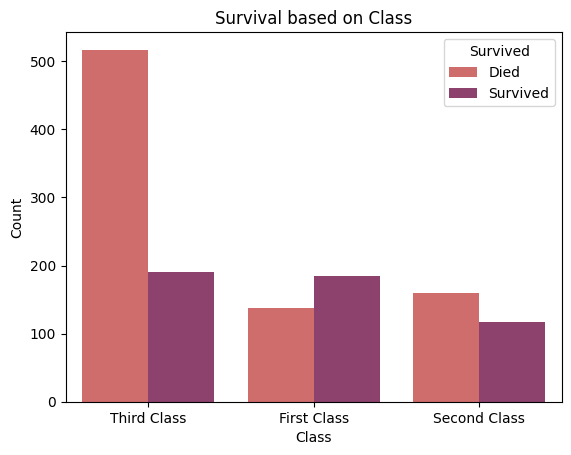

In [154]:
sns.countplot(x='Pclass', hue='Survived', data=data, palette='flare')
plt.title('Survival based on Class')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

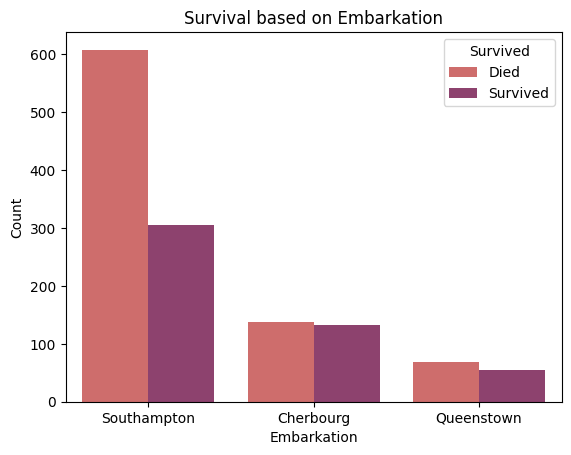

In [155]:
sns.countplot(x='Embarked', hue='Survived', data=data, palette='flare')
plt.title('Survival based on Embarkation')
plt.xlabel('Embarkation')
plt.ylabel('Count')
plt.show()

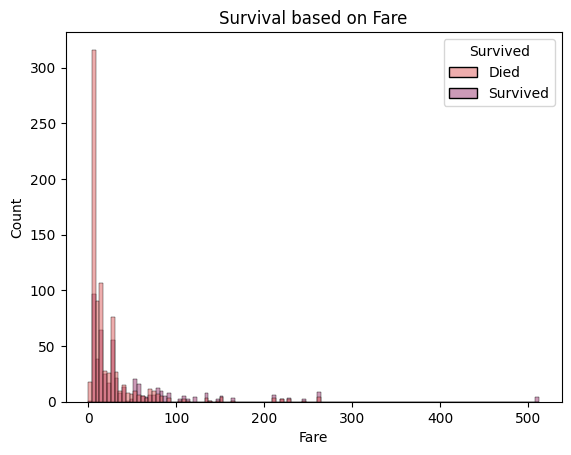

In [171]:
sns.histplot(x='Fare', hue='Survived', data=data, palette='flare')
plt.title('Survival based on Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [157]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1306 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1306 non-null   int64  
 1   Survived     1306 non-null   object 
 2   Pclass       1306 non-null   object 
 3   Name         1306 non-null   object 
 4   Sex          1306 non-null   object 
 5   Age          1306 non-null   float64
 6   SibSp        1306 non-null   int64  
 7   Parch        1306 non-null   int64  
 8   Ticket       1306 non-null   object 
 9   Fare         1306 non-null   float64
 10  Embarked     1306 non-null   object 
 11  FamilySize   1306 non-null   int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 132.6+ KB


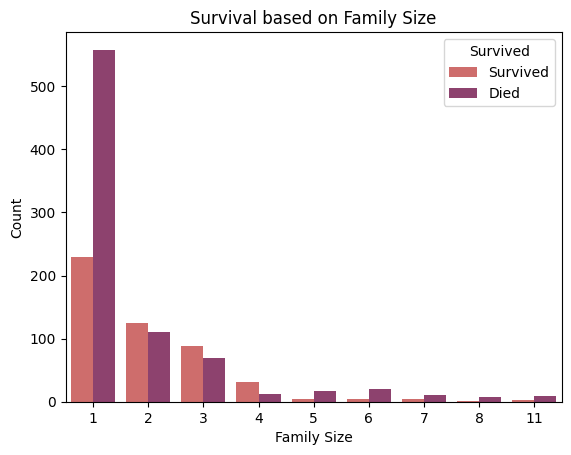

In [158]:
sns.countplot(x='FamilySize', hue='Survived', data=data, palette='flare')
plt.title('Survival based on Family Size')
plt.xlabel('Family Size')
plt.ylabel('Count')
plt.show()

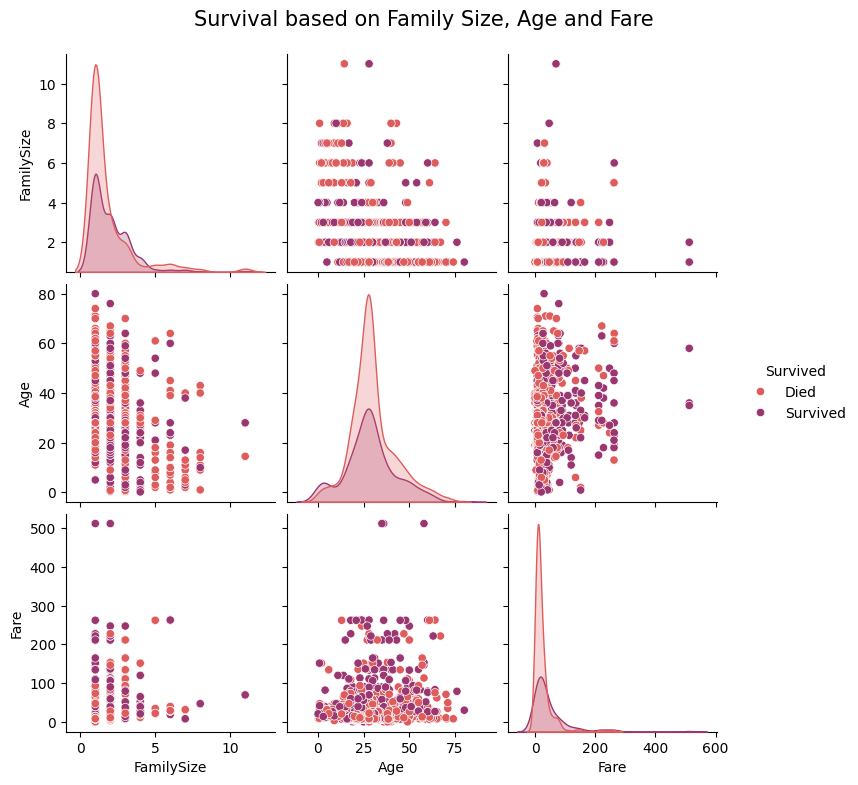

In [159]:
sns.pairplot(vars=['FamilySize', 'Age', 'Fare'], hue='Survived', data=data, palette='flare')
plt.title('Survival based on Family Size, Age and Fare', x=-0.4, y=3.2, size=15)
plt.show()

In [166]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize
0,1,Died,Third Class,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,Southampton,2
1,2,Survived,First Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,Cherbourg,2
2,3,Survived,Third Class,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,Southampton,1
3,4,Survived,First Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,Southampton,2
4,5,Died,Third Class,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,Southampton,1


In [169]:
data.shape

(1306, 12)

In [172]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(data['Survived'], data['Sex'])
chi2, p, _, _ = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")

if p < 0.05:
    print("The variables are dependent (reject the null hypothesis)")
else:
    print("The variables are independent (fail to reject the null hypothesis)")


Chi-square statistic: 614.1656258936159
P-value: 1.3890628126435165e-135
The variables are dependent (reject the null hypothesis)
